In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from dwave.system import EmbeddingComposite, DWaveSampler
from dwave.embedding.chain_strength import uniform_torque_compensation
import dwave.inspector
from shared.graph_helper import generate_butterfly_graph,draw_graph, load_nx_graph_from, load_graphs
from shared.QiskitMaxcut import Maxcut

%matplotlib inline

DIVIDER_LENGTH = 115

In [3]:
def run_qubo_with(max_cut):
    """ Run Experiments with D-WAVE """

    # ------- Run our QUBO on the QPU -------
    # Set up QPU parameters
    chain_strength = partial(uniform_torque_compensation, prefactor=2)
    num_reads = 1000
    Q = max_cut.calculate_Q_matrix()

    # Run the QUBO on the solver from your config file
    sampler = EmbeddingComposite(DWaveSampler())
    response = sampler.sample_qubo(Q,
                                   chain_strength=chain_strength,
                                   num_reads=num_reads,
                                   label='QUBO {}'.format(max_cut.graph.name))

    # Inspect
    # dwave.inspector.show(response)

    # ------- Calculate distribution -------
    distribution = {}
    mean = sum([r[1] * r[2] for r in response.record]) / num_reads

    for sample, E, occ, cbf in response.data(fields=['sample', 'energy', 'num_occurrences', 'chain_break_fraction']):
        if int(E) in distribution:
            distribution[int(E)] += occ
        else:
            distribution[int(E)] = occ

    distribution_nn = distribution.copy()
    for e, o in distribution.items():
        if distribution[e] == 0:
            distribution_nn.pop(e)

    # ------- Plot results to user -------
    plt.clf()
    plt.bar(distribution_nn.keys(), distribution_nn.values())  # density=False would make counts
    plt.ylabel('Solution Occurrences')
    plt.xlabel('Energy')
    plt.title(f"Expectation Value (Ø: {mean:.3f})")
    plt.show()

    print('Lowest Energy (MaxCut): {:>5s}'.format(str(response.first.energy)))
    print('Mean: {:>5s}'.format(str(mean)))
    best_bitstring = np.array(list(response.first.sample.values()))
    print(f"Solution BitString: {best_bitstring}")

    # ------- Draw cut graph to user -------
    plt.clf()
    max_cut.draw(best_bitstring)
    plt.show()

    # ------- Print results to user -------
    print('Additional Information:')
    print('ID: {:>15s}'.format(str(response.info['problem_id'])))
    print('Chain strength: {:>5s}'.format(str(response.info['embedding_context']['chain_strength'])))

    print()
    print('{:>15s}{:>15s}{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}'.format('Set 0', 'Set 1', 'Energy', 'Cut Size', 'Occurrences', 'Bitstring', 'Chain Break Fraction'))
    print('-' * DIVIDER_LENGTH)
    for sample, E, occ, cbf in response.data(fields=['sample', 'energy', 'num_occurrences', 'chain_break_fraction']):
        S0 = [k for k, v in sample.items() if v == 0]
        S1 = [k for k, v in sample.items() if v == 1]
        print('{:>15s}{:>15s}{:^15s}{:^15s}{:^15s}{:^15s}{:^15s}'.format(str(S0), str(S1), str(E), str(int(-1 * E)), str(occ), ", ".join(map(str, sample.values())), str(cbf)))
    
    print('-' * DIVIDER_LENGTH)

In [4]:
def calculate_maxcut_for(graph):
    print('-' * DIVIDER_LENGTH)
    print(f"Running filename: {graph.name}")
    plt.clf()
    draw_graph(graph)
    plt.show()

    max_cut = Maxcut(graph)
    run_qubo_with(max_cut)

In [5]:
def run_butterfly_graph():
    graph = generate_butterfly_graph()
    calculate_maxcut_for(graph)

In [6]:
def run_all(nodes=None):
    graph_dirs = load_graphs(nodes)
    for dir, graphs in graph_dirs:
        for graph in graphs:
            calculate_maxcut_for(graph)

In [7]:
#run_butterfly_graph()

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_04_01


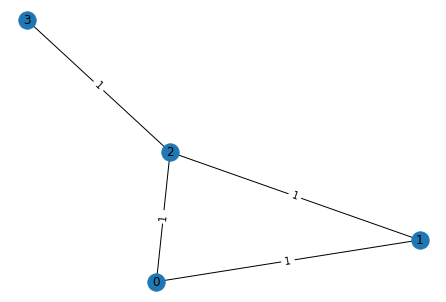

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_04_02


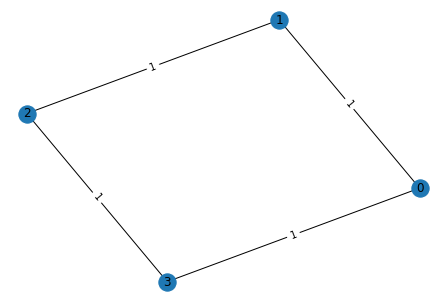

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_04_03


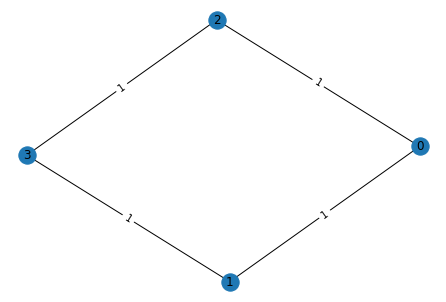

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_04_03_w


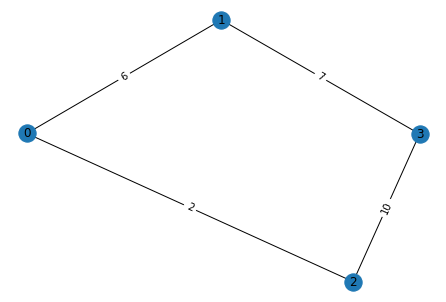

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_05_01


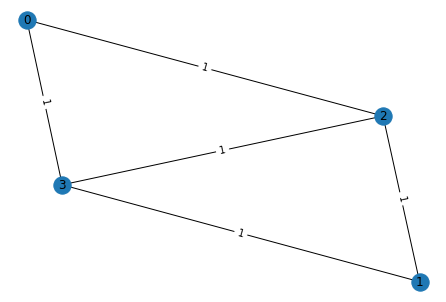

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_05_01_w


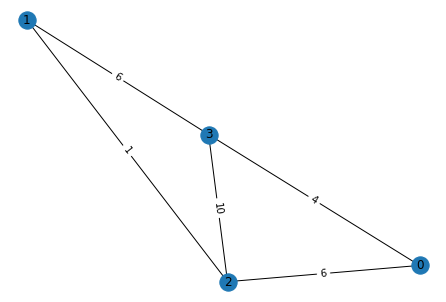

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_06_01


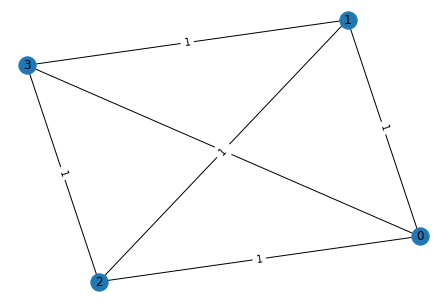

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_04_06_01_w


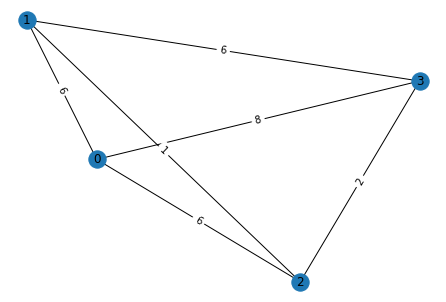

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_4_05_02


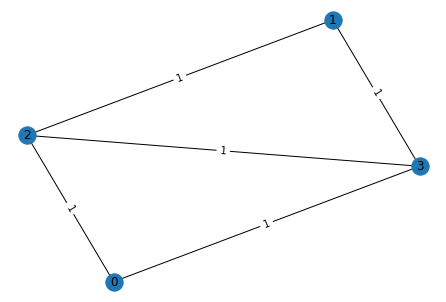

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_4_05_02_w


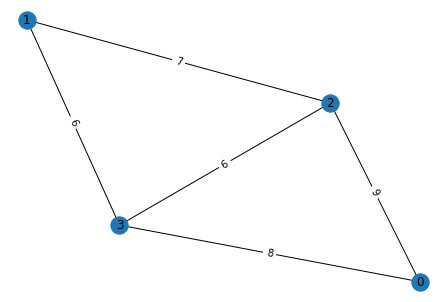

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_06_01


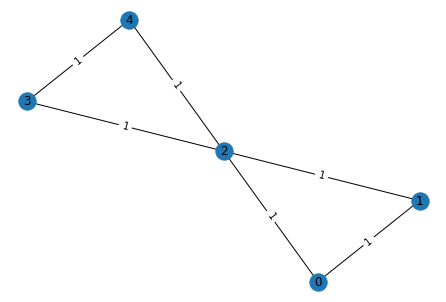

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_06_01_w


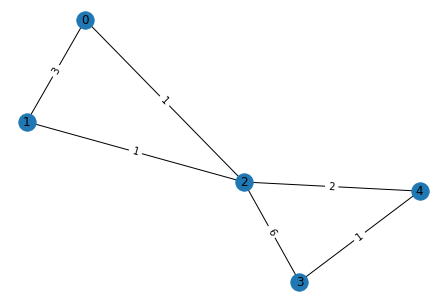

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_06_02


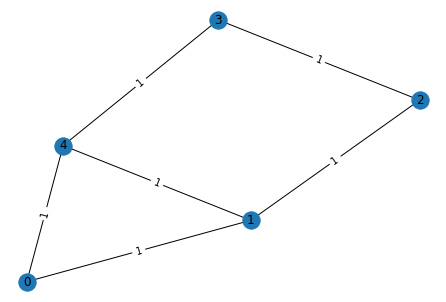

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_07_01


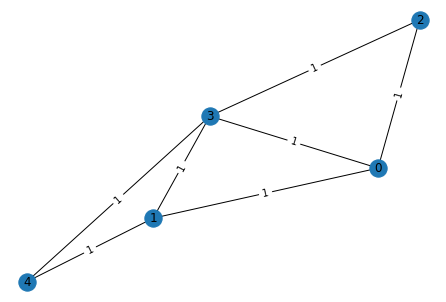

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_07_01_w


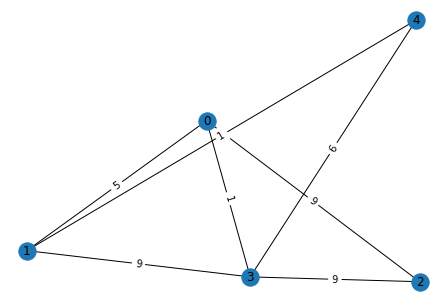

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_10_01


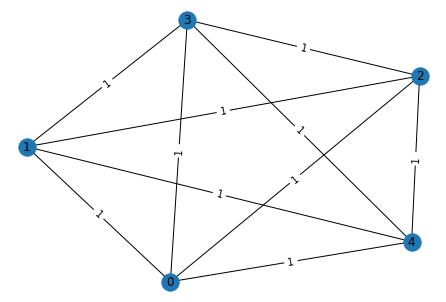

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_05_10_01_w


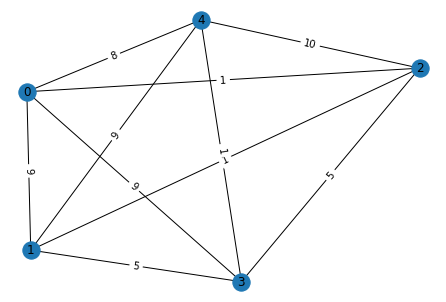

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_5_06_02


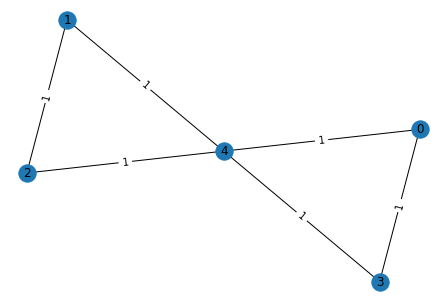

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_5_06_02_w


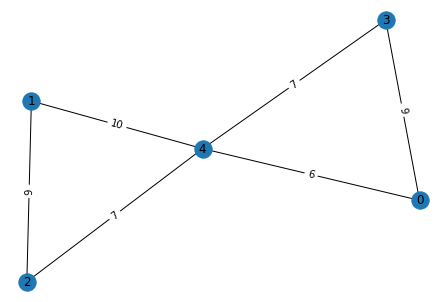

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_5_06_03


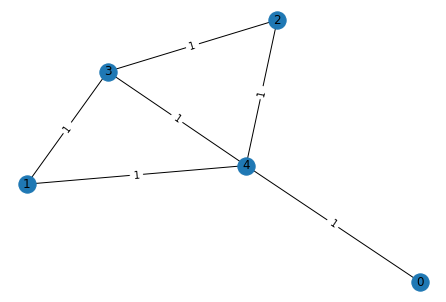

-------------------------------------------------------------------------------------------------------------------
Running filename: graph_5_06_03_w


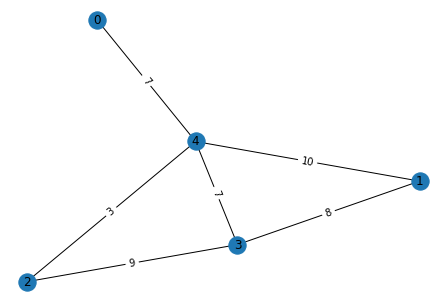

In [9]:
run_all(nodes=[5])